In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/NCAA_MARCH_MADNESS2015-2020.csv')

In [3]:
df[100:180]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
100,Miami FL,ACC,38,25,111.2,96.0,0.8446,49.9,47.6,15.9,...,28.5,47.4,47.1,35.8,32.4,62.9,0.7,NaN,NaN,2015
101,Pittsburgh,ACC,33,18,113.2,101.7,0.7749,49.1,50.0,15.7,...,37.8,48.6,49.0,33.6,34.9,60.9,-1.5,NaN,NaN,2015
102,Syracuse,ACC,31,18,106.1,90.8,0.8565,47.3,46.4,17.9,...,30.0,48.3,45.9,30.0,31.4,66.4,-0.3,NaN,NaN,2015
103,Virginia Tech,ACC,33,11,105.5,104.8,0.5204,51.5,50.8,18.1,...,33.8,47.7,49.6,38.9,35.1,64.2,-8.9,NaN,NaN,2015
104,Wake Forest,ACC,32,13,104.8,98.1,0.6826,47.8,50.9,19.3,...,35.2,46.5,51.1,33.6,33.8,68.7,-5.7,NaN,NaN,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Houston,Amer,32,13,100.9,102.3,0.4593,46.5,49.1,20.5,...,33.2,45.2,48.4,32.0,33.7,64.6,-11.6,NaN,NaN,2015
176,Memphis,Amer,32,18,104.7,95.1,0.7509,48.4,44.4,20.2,...,38.7,48.1,43.8,32.8,30.4,66.6,-5.4,NaN,NaN,2015
177,South Florida,Amer,31,8,97.2,105.4,0.2812,47.3,49.1,20.9,...,42.5,47.7,45.4,30.9,37.4,64.4,-14.5,NaN,NaN,2015
178,Temple,Amer,37,26,104.3,92.3,0.8029,44.2,44.5,14.6,...,33.5,43.4,43.3,30.4,31.4,65.9,-0.4,NaN,NaN,2015


In [4]:
df = df.fillna(0)

In [5]:
df['POSTSEASON'].unique()

array(['2ND', 'Champions', 'E8', 'F4', 0, 'R32', 'R64', 'R68', 'S16'],
      dtype=object)

In [6]:
df['POSTSEASON']

0       2ND
1       2ND
2       2ND
3       2ND
4       2ND
       ... 
1752    S16
1753    S16
1754    S16
1755    S16
1756    S16
Name: POSTSEASON, Length: 1757, dtype: object

In [7]:
df = df.replace({'POSTSEASON': {'Champions': 1, '2ND': 2, 'F4': 3, 'E8': 4,'S16': 5, 'R32': 6, 'R64': 7, 'R68': 8}})

In [8]:
df = df.replace({'SEED': {0: 17}})

In [9]:
df['POSTSEASON'].unique()

array([2, 1, 4, 3, 0, 6, 7, 8, 5])

In [10]:
df['SEED'].unique()

array([ 1.,  3.,  2.,  4.,  6.,  9., 11., 10.,  7.,  5., 17.,  8., 16.,
       12., 13., 14., 15.])

In [11]:
df.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [12]:
#ReNaming columns
df = df.rename(columns={"G": "games_played", "W": "wins","ADJOE": "Adjusted Offensive Efficiency", "ADJDE": "Adjusted Defensive Efficiency",
                  "BARTHAG": "Power Rating", "EFG_O": "Effective_Field_Goal_Percentage_Shot","EFG_D": "Effective_Field_Goal_Percentage_Allowed", "TOR": "Turnover_Rate",
                  "TORD": "Steal_Rate", "ORB": "Offensive_Rebounds","DRB": "Defensive_Rebounds", "FTR": "Free_Throw_Rate",
                  "FTRD": "Free_Throw_Rate_Allowed", "2P_O": "Two_Point_Shooting_Percentage","2P_D": "Two_Point_Shooting_Percentage_Allowed", "3P_O": "Three_Point_Shooting_Percentage",
                  "3P_D": "Three_Point_Shooting_Percentage_Allowed", "ADJ_T": "Adjusted_Tempo","WAB": "Wins_Above_Bubble"})

In [13]:
df.columns

Index(['TEAM', 'CONF', 'games_played', 'wins', 'Adjusted Offensive Efficiency',
       'Adjusted Defensive Efficiency', 'Power Rating',
       'Effective_Field_Goal_Percentage_Shot',
       'Effective_Field_Goal_Percentage_Allowed', 'Turnover_Rate',
       'Steal_Rate', 'Offensive_Rebounds', 'Defensive_Rebounds',
       'Free_Throw_Rate', 'Free_Throw_Rate_Allowed',
       'Two_Point_Shooting_Percentage',
       'Two_Point_Shooting_Percentage_Allowed',
       'Three_Point_Shooting_Percentage',
       'Three_Point_Shooting_Percentage_Allowed', 'Adjusted_Tempo',
       'Wins_Above_Bubble', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [14]:
df['CONF'].unique()

array(['ACC', 'B10', 'B12', 'WCC', 'BE', 'P12', 'SEC', 'MVC', 'A10', 'AE',
       'Amer', 'ASun', 'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'Horz', 'Ind',
       'Ivy', 'MAAC', 'MAC', 'MEAC', 'MWC', 'NEC', 'OVC', 'Pat', 'SB',
       'SC', 'Slnd', 'Sum', 'SWAC', 'WAC'], dtype=object)

In [15]:
len(df['CONF'].unique())

33

In [16]:
#Create win percentage column
df['Win_Percentage'] = (df['wins']/df['games_played'])*100
df['Win_Percentage']

0       82.500000
1       90.000000
2       82.500000
3       81.578947
4       94.871795
          ...    
1752    62.857143
1753    80.000000
1754    86.111111
1755    77.142857
1756    86.486486
Name: Win_Percentage, Length: 1757, dtype: float64

In [17]:
df['Qualified?'] = df['SEED'].apply(lambda x: 1 if x <= 16 else 0)

In [18]:
df['Qualified?'].value_counts()

0    1417
1     340
Name: Qualified?, dtype: int64

In [19]:
df_n = df

In [20]:
df_all_qualfied = df.copy()

In [21]:
df_all_qualfied

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2,1.0,2016,82.500000,1
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2,1.0,2015,90.000000,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2,3.0,2018,82.500000,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2,3.0,2019,81.578947,1
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2,1.0,2017,94.871795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,45.7,32.9,32.6,70.3,1.9,5,7.0,2018,62.857143,1
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,49.4,31.9,33.7,71.2,7.3,5,3.0,2019,80.000000,1
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,44.7,36.7,35.4,68.8,9.9,5,2.0,2019,86.111111,1
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,44.4,37.8,30.3,68.2,2.1,5,11.0,2016,77.142857,1


In [22]:
remove_17 = df_all_qualfied[df_all_qualfied["SEED"] == 17].index

In [23]:
df_all_qualfied = df_all_qualfied.drop(remove_17)

In [24]:
df_all_qualfied

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2,1.0,2016,82.500000,1
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2,1.0,2015,90.000000,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2,3.0,2018,82.500000,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2,3.0,2019,81.578947,1
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2,1.0,2017,94.871795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,45.7,32.9,32.6,70.3,1.9,5,7.0,2018,62.857143,1
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,49.4,31.9,33.7,71.2,7.3,5,3.0,2019,80.000000,1
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,44.7,36.7,35.4,68.8,9.9,5,2.0,2019,86.111111,1
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,44.4,37.8,30.3,68.2,2.1,5,11.0,2016,77.142857,1


In [25]:
df

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2,1.0,2016,82.500000,1
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2,1.0,2015,90.000000,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2,3.0,2018,82.500000,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2,3.0,2019,81.578947,1
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2,1.0,2017,94.871795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,45.7,32.9,32.6,70.3,1.9,5,7.0,2018,62.857143,1
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,49.4,31.9,33.7,71.2,7.3,5,3.0,2019,80.000000,1
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,44.7,36.7,35.4,68.8,9.9,5,2.0,2019,86.111111,1
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,44.4,37.8,30.3,68.2,2.1,5,11.0,2016,77.142857,1


#### GRAPHS

In [26]:
data_5 = df[df['YEAR'] == 2015]
data_6 = df[df['YEAR'] == 2016]
data_7 = df[df['YEAR'] == 2017]
data_8 = df[df['YEAR'] == 2018]
data_9 = df[df['YEAR'] == 2019]

In [27]:
conference_mean = df.groupby(["CONF"]).mean()
conference_sum = df.groupby(["CONF"]).sum()

In [194]:
seed_mean = df.groupby(["SEED"]).mean()
seed_sum = df.groupby(["SEED"]).sum()

In [195]:
seed_mean

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
SEED,,,,,,,,,,,,,,,,,,,,,
1.0,37.600000,32.750000,121.645000,91.595000,0.960250,55.090000,46.490000,15.995000,18.730000,33.070000,...,0.050000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.100000
2.0,36.650000,30.100000,118.620000,91.950000,0.947360,53.710000,45.950000,16.775000,18.005000,33.705000,...,0.100000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.050000
3.0,35.857143,27.857143,117.080952,93.700000,0.926052,53.552381,46.871429,17.228571,18.933333,32.800000,...,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000
4.0,35.315789,26.368421,115.494737,93.778947,0.911705,52.721053,47.457895,17.252632,19.194737,32.815789,...,0.105263,0.000000,0.000000,0.000000,0.157895,0.000000,0.000000,0.000000,0.000000,0.052632
5.0,35.050000,25.350000,115.510000,94.300000,0.907665,52.940000,47.840000,17.290000,19.320000,31.835000,...,0.050000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
6.0,34.300000,24.600000,114.420000,95.315000,0.887835,52.600000,47.775000,17.215000,18.470000,32.420000,...,0.050000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
7.0,34.500000,25.150000,113.190000,95.115000,0.873535,51.970000,47.935000,16.335000,19.285000,31.070000,...,0.050000,0.000000,0.000000,0.050000,0.150000,0.000000,0.000000,0.000000,0.000000,0.050000
8.0,34.100000,23.000000,111.905000,95.645000,0.856530,51.625000,47.425000,17.760000,18.325000,31.500000,...,0.150000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000
9.0,34.050000,21.750000,111.405000,95.495000,0.852735,51.605000,47.660000,17.955000,18.960000,30.460000,...,0.050000,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000


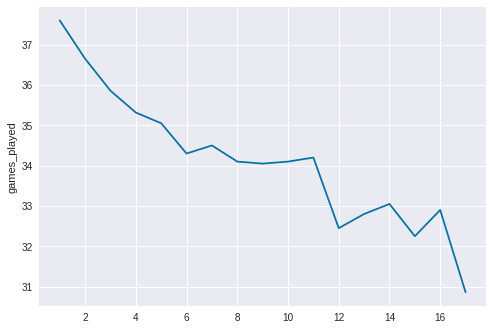

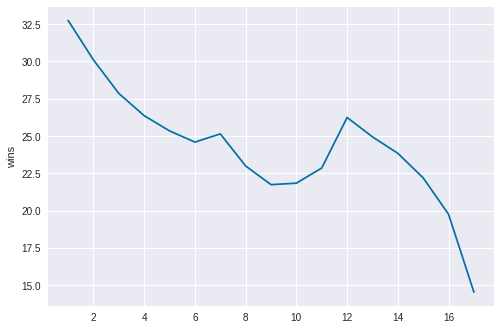

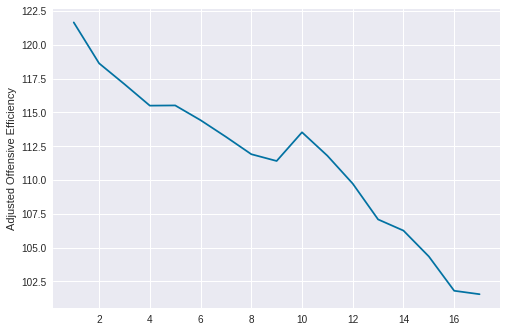

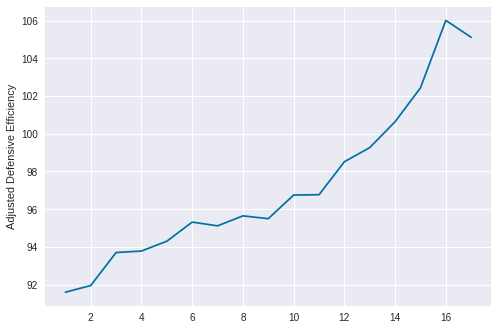

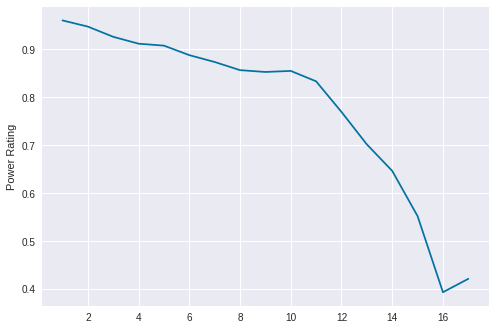

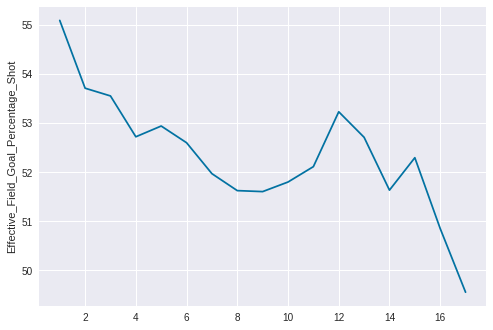

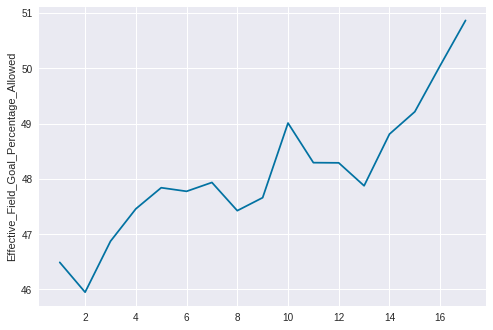

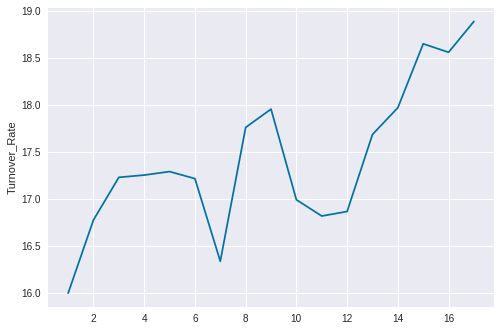

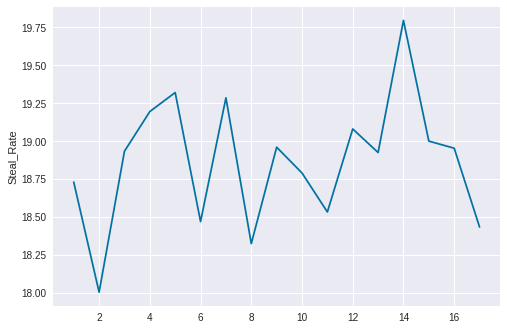

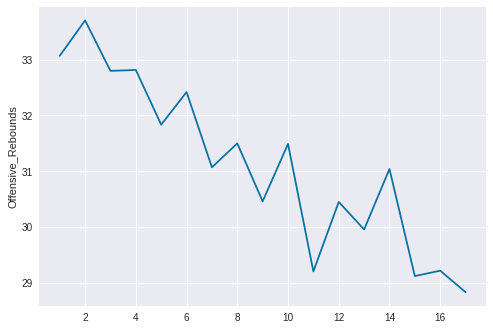

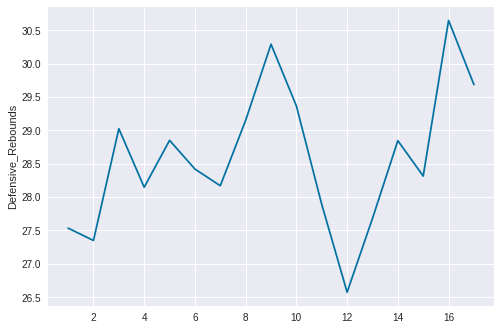

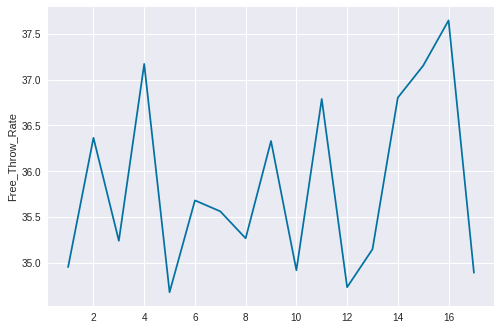

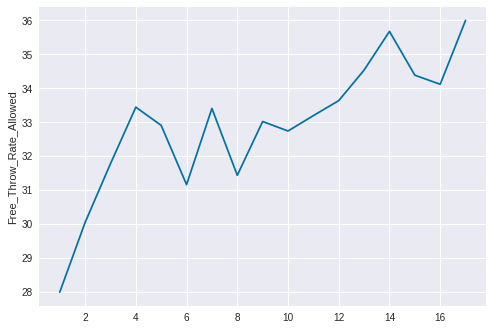

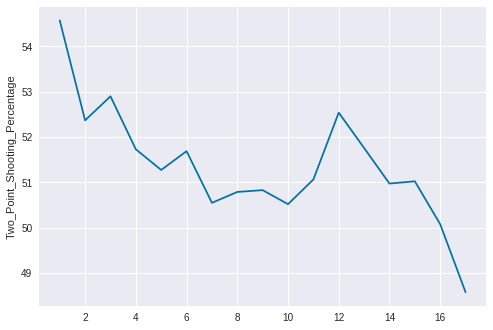

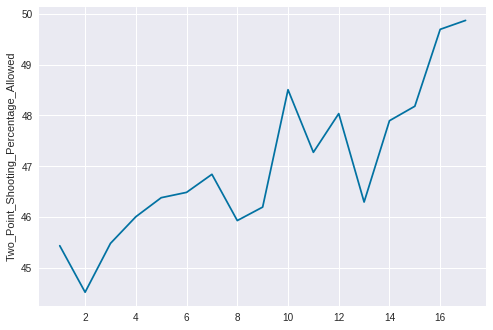

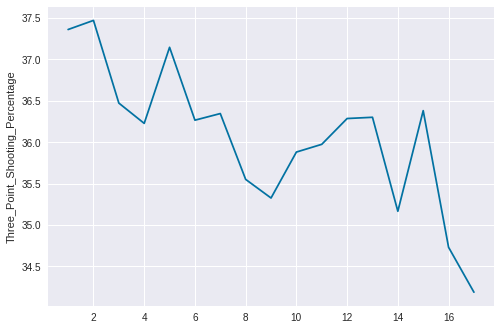

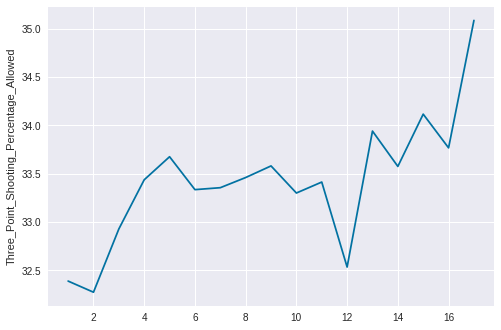

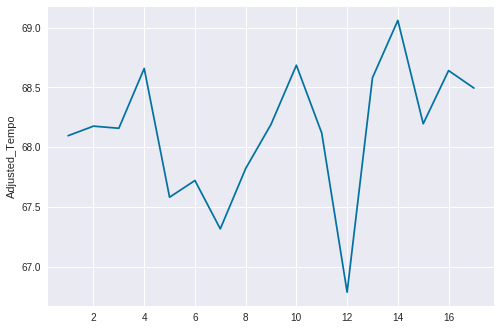

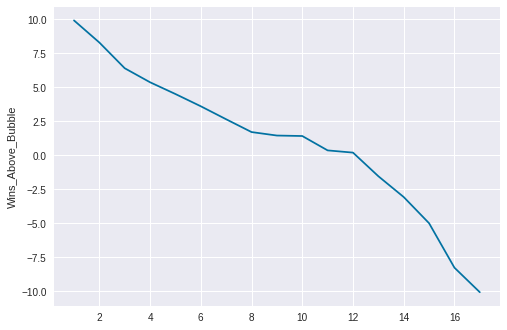

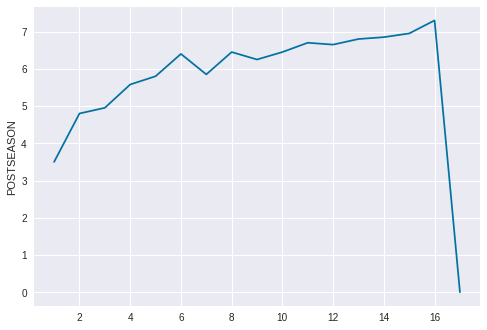

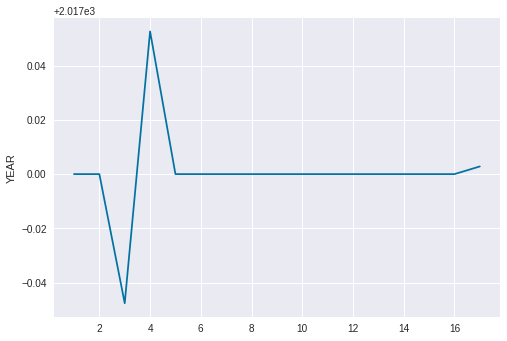

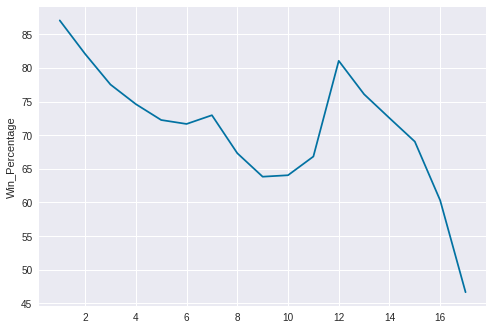

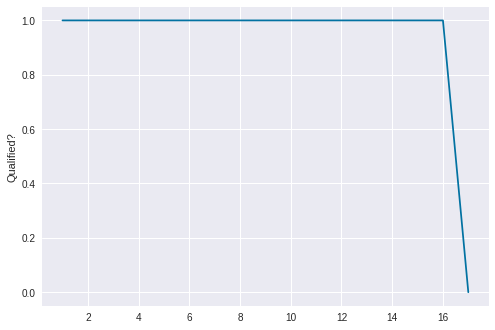

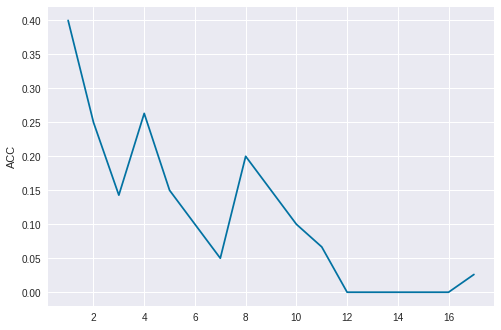

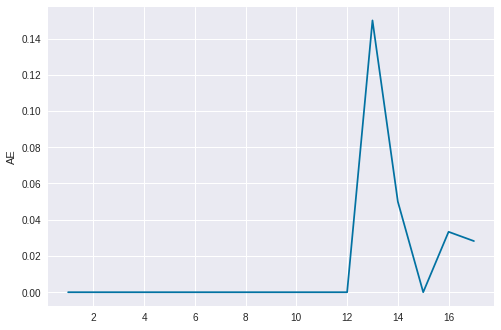

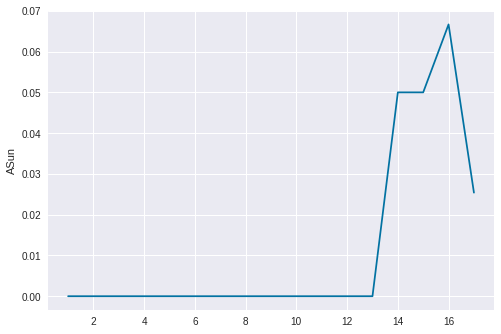

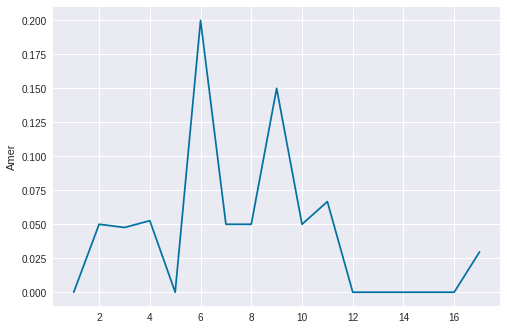

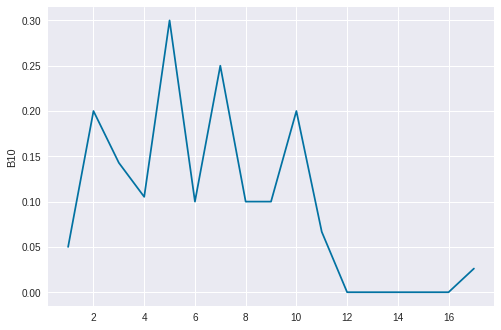

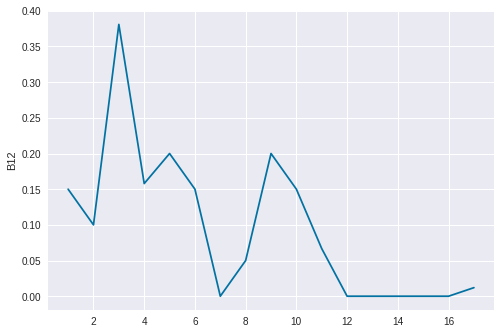

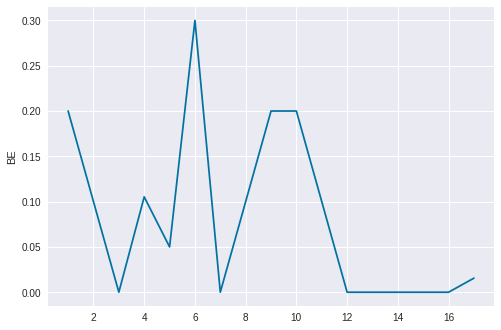

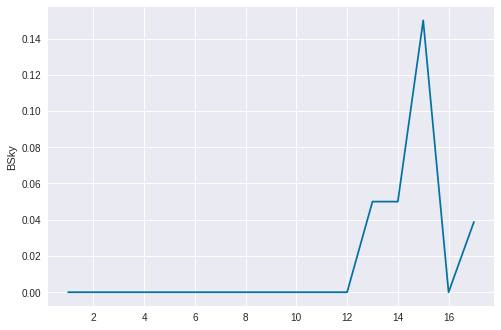

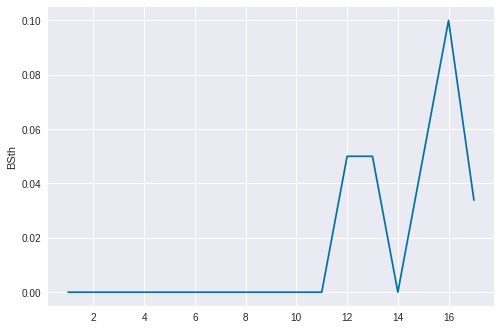

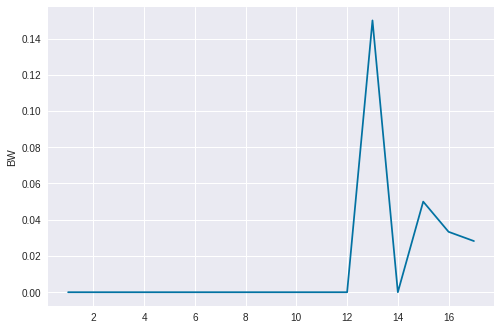

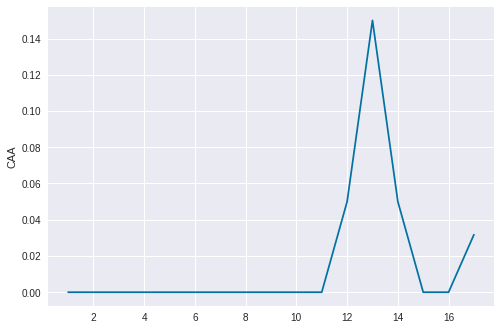

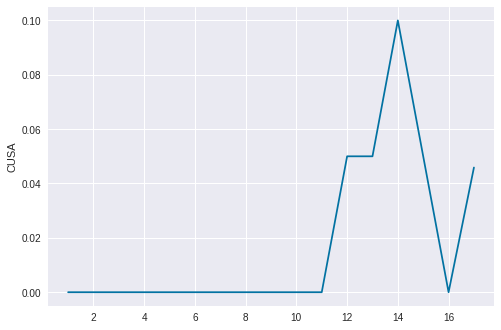

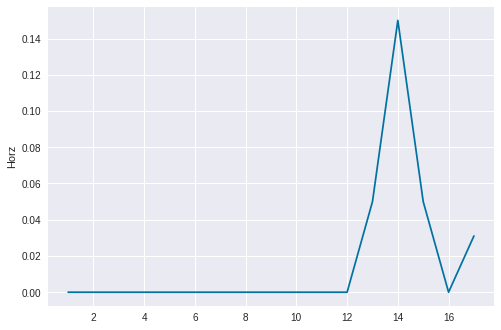

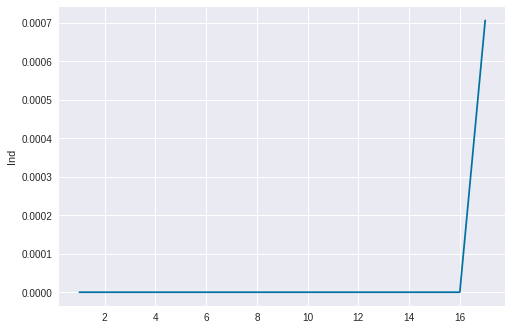

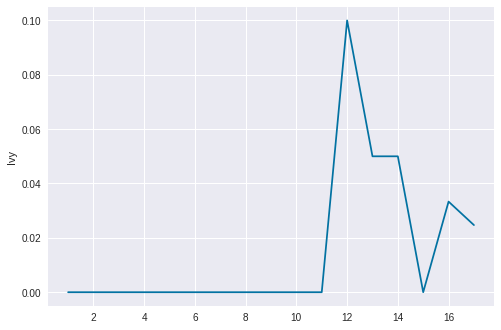

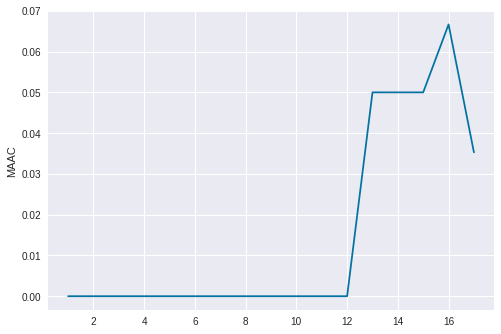

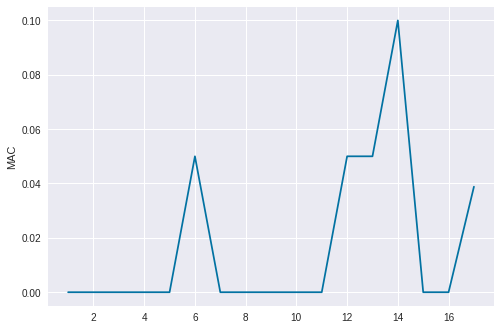

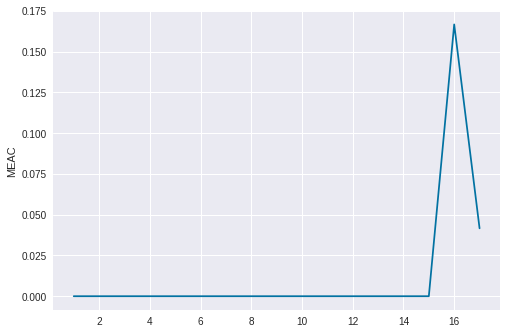

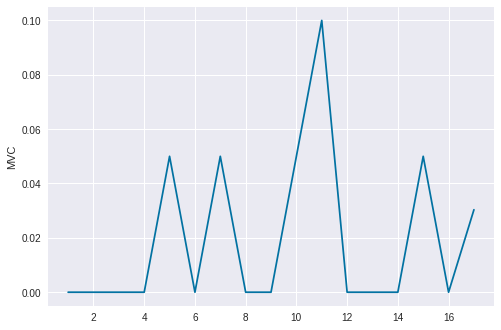

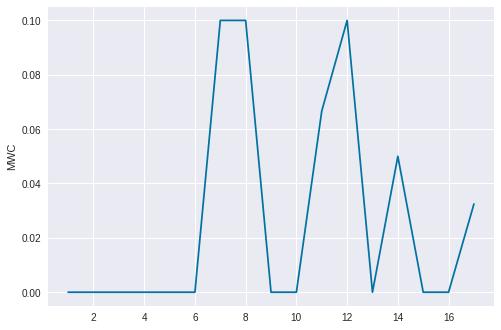

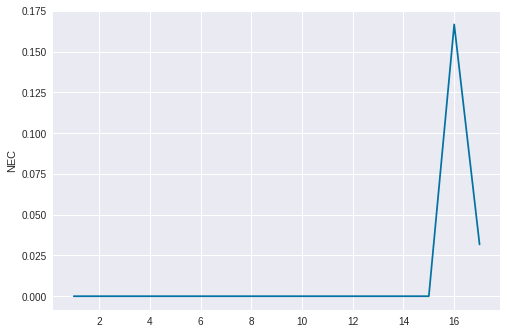

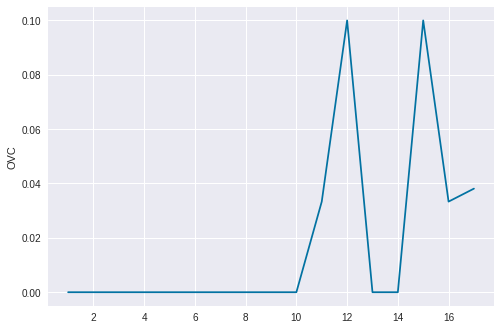

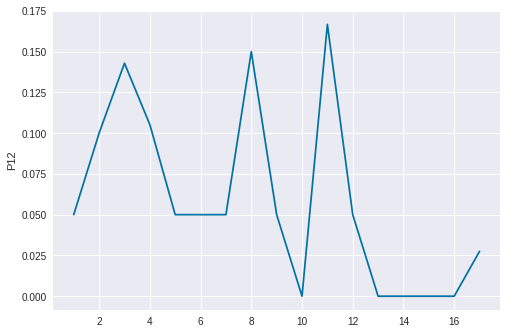

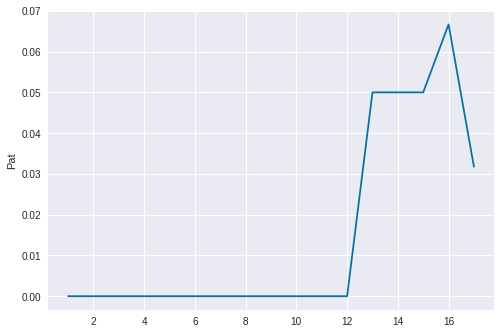

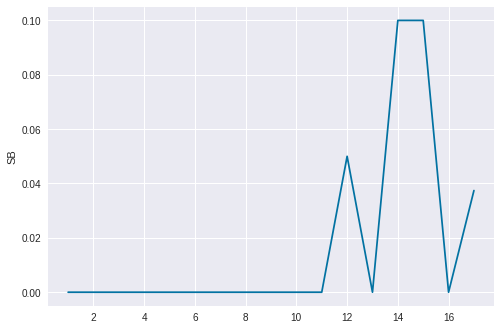

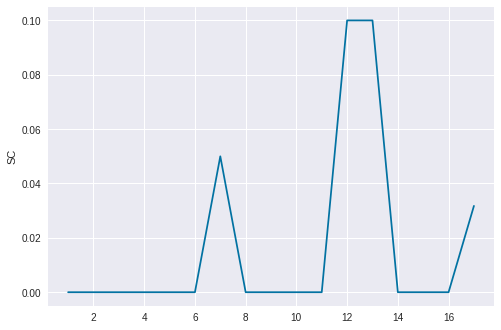

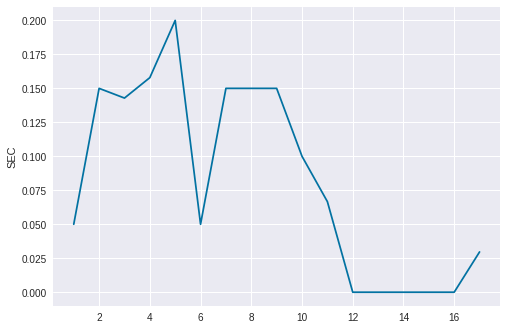

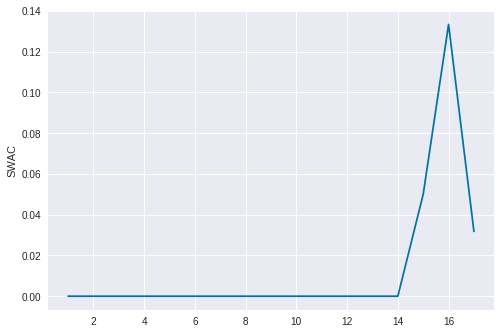

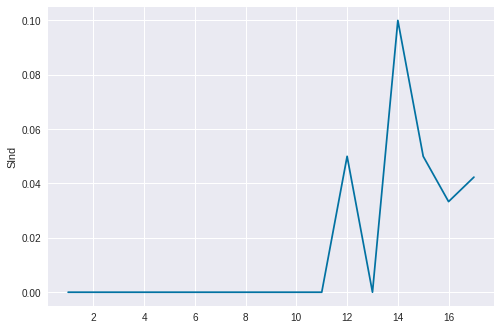

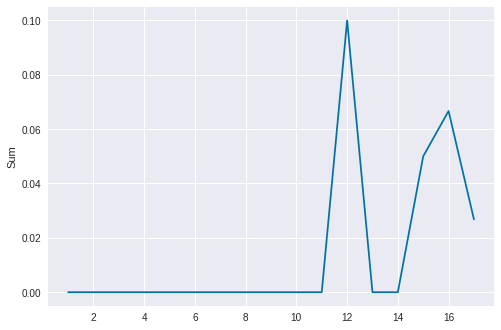

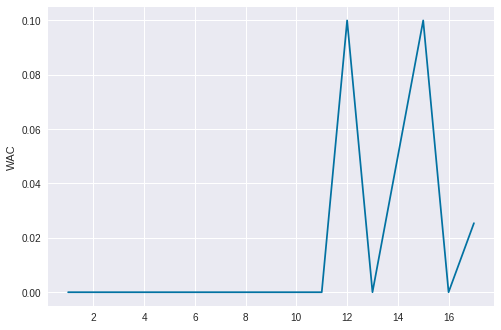

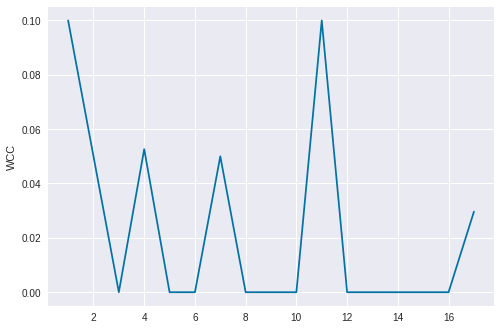

In [209]:
plt.style.use('seaborn-darkgrid')
for i in seed_mean.columns:
    plt.plot(seed_mean.index, seed_mean[i])
    #plt.xlabel(seed_mean.index)
    plt.ylabel(i)
    plt.show()

In [28]:
conference_mean

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
CONF,,,,,,,,,,,,,,,,,,,,,
A10,32.642857,17.385714,105.055714,101.025714,0.594563,50.042857,49.657143,18.022857,18.638571,28.500000,...,48.798571,33.720000,34.114286,68.122857,-6.578571,1.328571,15.485714,2017.000000,52.799629,0.200000
ACC,34.306667,21.093333,112.461333,96.256000,0.820261,51.266667,48.521333,17.376000,18.249333,31.594667,...,47.445333,35.080000,33.574667,67.813333,0.937333,2.586667,10.813333,2017.000000,60.692095,0.506667
AE,31.044444,15.022222,98.824444,106.511111,0.329853,49.702222,51.171111,18.984444,18.533333,27.120000,...,50.326667,34.353333,35.115556,67.880000,-11.546667,0.755556,16.644444,2017.000000,47.701200,0.111111
ASun,29.925000,14.175000,100.660000,108.597500,0.316492,50.440000,52.105000,18.455000,17.570000,28.315000,...,51.665000,34.837500,35.212500,69.862500,-11.585000,0.725000,16.825000,2017.000000,46.772682,0.100000
Amer,32.912281,18.526316,106.005263,99.294737,0.644409,49.424561,47.896491,18.482456,18.550877,31.866667,...,46.514035,33.982456,33.457895,67.498246,-4.473684,1.736842,14.403509,2017.052632,55.620496,0.263158
B10,34.014286,20.400000,110.994286,96.442857,0.800939,51.025714,48.352857,17.434286,18.025714,30.638571,...,46.784286,35.281429,34.210000,67.482857,-0.092857,2.600000,11.828571,2017.000000,59.255980,0.471429
B12,34.400000,21.340000,112.966000,95.028000,0.860170,51.178000,48.502000,18.240000,19.542000,32.434000,...,47.012000,35.464000,34.162000,68.260000,2.236000,3.780000,9.320000,2017.000000,61.494580,0.660000
BE,33.840000,20.420000,111.898000,97.270000,0.803320,52.018000,49.736000,17.864000,18.826000,29.758000,...,48.856000,35.536000,34.138000,69.000000,0.212000,3.360000,11.120000,2017.000000,59.698581,0.560000
BSky,30.033333,14.433333,101.470000,108.355000,0.338455,51.083333,52.585000,18.038333,17.700000,26.950000,...,51.480000,35.900000,36.428333,68.996667,-11.686667,0.583333,16.783333,2017.000000,47.529801,0.083333


In [29]:
conference_2019 = data_9.groupby(["CONF"]).sum()
conference_2018 = data_8.groupby(["CONF"]).sum()
conference_2017 = data_7.groupby(["CONF"]).sum()
conference_2016 = data_6.groupby(["CONF"]).sum()
conference_2015 = data_5.groupby(["CONF"]).sum()

In [30]:
conference_2019

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
CONF,,,,,,,,,,,,,,,,,,,,,
A10,460,235,1442.5,1416.4,7.6057,694.7,690.6,253.8,263.1,388.6,...,686.7,454.8,463.5,956.0,-115.7,14,225.0,28266,711.850838,2
ACC,514,316,1664.0,1427.1,12.0859,758.4,722.7,267.0,286.5,461.6,...,717.1,505.7,486.7,1031.3,14.8,34,162.0,30285,905.666339,7
AE,278,137,878.3,958.5,2.7111,448.4,461.9,173.2,169.0,232.9,...,457.4,304.6,311.8,610.4,-109.3,7,149.0,18171,436.425410,1
ASun,248,115,790.6,842.9,2.7499,390.7,410.5,153.6,144.1,215.6,...,405.4,266.4,279.5,568.5,-91.0,0,136.0,16152,361.129951,0
Amer,407,239,1287.1,1175.9,8.4307,597.5,581.0,218.7,228.2,374.3,...,575.1,398.7,393.2,830.6,-36.5,26,166.0,24228,693.820006,4
B10,484,290,1557.1,1317.6,11.9111,705.0,671.7,239.1,250.4,415.7,...,663.5,476.0,457.3,954.7,25.9,43,151.0,28266,829.088312,8
B12,353,216,1120.6,943.8,8.5979,512.4,483.8,181.6,192.1,300.4,...,473.0,348.0,333.4,685.5,22.3,34,103.0,20190,608.777511,6
BE,343,202,1097.1,990.9,7.5661,521.3,506.3,177.8,184.0,287.2,...,497.2,351.0,346.6,696.0,-16.0,28,134.0,20190,588.287497,4
BSky,361,182,1201.6,1306.7,3.5433,615.7,634.1,215.8,206.7,312.1,...,627.1,421.3,431.3,836.2,-148.6,7,202.0,24228,600.532187,1


In [31]:
con = conference_sum[conference_sum["Qualified?"] >= 7]
con_min = conference_sum[conference_sum["Qualified?"] < 5]

In [32]:
con

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
CONF,,,,,,,,,,,,,,,,,,,,,
A10,2285,1217,7353.9,7071.8,41.6194,3503.0,3476.0,1261.6,1304.7,1995.0,...,3415.9,2360.4,2388.0,4768.6,-460.5,93,1084.0,141190,3695.974014,14
ACC,2573,1582,8434.6,7219.2,61.5196,3845.0,3639.1,1303.2,1368.7,2369.6,...,3558.4,2631.0,2518.1,5086.0,70.3,194,811.0,151275,4551.907132,38
Amer,1876,1056,6042.3,5659.8,36.7313,2817.2,2730.1,1053.5,1057.4,1816.4,...,2651.3,1937.0,1907.1,3847.4,-255.0,99,821.0,114972,3170.368253,15
B10,2381,1428,7769.6,6751.0,56.0657,3571.8,3384.7,1220.4,1261.8,2144.7,...,3274.9,2469.7,2394.7,4723.8,-6.5,182,828.0,141190,4147.918588,33
B12,1720,1067,5648.3,4751.4,43.0085,2558.9,2425.1,912.0,977.1,1621.7,...,2350.6,1773.2,1708.1,3413.0,111.8,189,466.0,100850,3074.729024,33
BE,1692,1021,5594.9,4863.5,40.1660,2600.9,2486.8,893.2,941.3,1487.9,...,2442.8,1776.8,1706.9,3450.0,10.6,168,556.0,100850,2984.929064,28
MVC,1592,865,5152.8,5022.7,27.6098,2494.4,2470.0,946.1,953.4,1335.0,...,2400.2,1754.1,1731.7,3346.5,-369.7,39,801.0,100850,2680.474869,7
MWC,1739,945,5750.7,5594.7,31.4185,2765.1,2733.4,996.7,986.4,1534.7,...,2675.5,1895.5,1891.9,3770.0,-381.9,61,872.0,110935,2943.243215,9
P12,1999,1160,6545.5,5947.7,43.2479,3085.2,2965.1,1079.0,1066.2,1815.2,...,2880.4,2131.7,2085.1,4130.2,-159.9,125,803.0,121020,3432.366249,21


In [33]:
con_min

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
CONF,,,,,,,,,,,,,,,,,,,,,
ASun,1197,567,4026.4,4343.9,12.6597,2017.6,2084.2,738.2,702.8,1132.6,...,2066.6,1393.5,1408.5,2794.5,-463.4,29,673.0,80680,1870.907274,4
Ind,29,17,103.3,104.5,0.4644,52.3,46.4,20.5,19.0,28.8,...,44.6,37.1,33.1,67.1,-6.2,0,17.0,2015,58.620690,0


In [34]:
con1 = conference_mean[conference_mean["wins"] > 18]
con1

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
CONF,,,,,,,,,,,,,,,,,,,,,
ACC,34.306667,21.093333,112.461333,96.256000,0.820261,51.266667,48.521333,17.376000,18.249333,31.594667,...,47.445333,35.080000,33.574667,67.813333,0.937333,2.586667,10.813333,2017.000000,60.692095,0.506667
Amer,32.912281,18.526316,106.005263,99.294737,0.644409,49.424561,47.896491,18.482456,18.550877,31.866667,...,46.514035,33.982456,33.457895,67.498246,-4.473684,1.736842,14.403509,2017.052632,55.620496,0.263158
B10,34.014286,20.400000,110.994286,96.442857,0.800939,51.025714,48.352857,17.434286,18.025714,30.638571,...,46.784286,35.281429,34.210000,67.482857,-0.092857,2.600000,11.828571,2017.000000,59.255980,0.471429
B12,34.400000,21.340000,112.966000,95.028000,0.860170,51.178000,48.502000,18.240000,19.542000,32.434000,...,47.012000,35.464000,34.162000,68.260000,2.236000,3.780000,9.320000,2017.000000,61.494580,0.660000
BE,33.840000,20.420000,111.898000,97.270000,0.803320,52.018000,49.736000,17.864000,18.826000,29.758000,...,48.856000,35.536000,34.138000,69.000000,0.212000,3.360000,11.120000,2017.000000,59.698581,0.560000
P12,33.316667,19.333333,109.091667,99.128333,0.720798,51.420000,49.418333,17.983333,17.770000,30.253333,...,48.006667,35.528333,34.751667,68.836667,-2.665000,2.083333,13.383333,2017.000000,57.206104,0.350000
SEC,33.714286,19.642857,110.310000,96.712857,0.790094,50.195714,48.250000,18.350000,18.900000,31.970000,...,46.891429,34.394286,33.724286,68.628571,-0.764286,2.257143,12.600000,2017.000000,57.561867,0.400000


In [35]:
con1_min = conference_mean[conference_mean["wins"] < 15]
con1_min

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
CONF,,,,,,,,,,,,,,,,,,,,,
ASun,29.925000,14.175000,100.660000,108.597500,0.316492,50.440000,52.105000,18.455000,17.570000,28.315000,...,51.665000,34.837500,35.212500,69.862500,-11.585000,0.725000,16.825000,2017.00000,46.772682,0.100000
BSky,30.033333,14.433333,101.470000,108.355000,0.338455,51.083333,52.585000,18.038333,17.700000,26.950000,...,51.480000,35.900000,36.428333,68.996667,-11.686667,0.583333,16.783333,2017.00000,47.529801,0.083333
BW,30.355556,14.888889,100.935556,104.082222,0.424398,48.888889,49.737778,18.722222,18.068889,28.528889,...,48.277778,34.244444,35.140000,68.071111,-9.993333,0.733333,16.666667,2017.00000,48.207403,0.111111
Ivy,28.225000,14.450000,102.392500,103.647500,0.467645,50.992500,50.302500,19.082500,18.137500,27.047500,...,49.492500,34.957500,34.505000,68.125000,-8.422500,0.850000,16.550000,2017.00000,50.675096,0.125000
MEAC,30.500000,11.953125,94.231250,110.796875,0.158767,46.782812,51.050000,19.996875,19.203125,30.054687,...,50.681250,32.020313,34.426563,69.115625,-14.832812,0.593750,16.921875,2016.96875,38.949421,0.078125
NEC,30.940000,13.800000,97.586000,108.532000,0.244788,48.412000,50.956000,19.488000,19.232000,30.170000,...,50.276000,33.360000,34.792000,68.630000,-13.310000,0.740000,16.900000,2017.00000,44.246170,0.100000
OVC,29.966667,14.900000,101.610000,106.490000,0.380663,50.336667,51.751667,19.190000,19.165000,29.588333,...,50.796667,34.605000,35.591667,68.660000,-10.333333,0.683333,16.650000,2017.00000,49.027030,0.100000
Pat,31.120000,14.780000,100.404000,106.542000,0.345906,51.212000,51.742000,19.096000,18.660000,26.660000,...,50.792000,35.210000,35.560000,67.752000,-11.532000,0.700000,16.780000,2017.00000,47.140937,0.100000
SWAC,31.040000,11.860000,93.278000,110.490000,0.152550,46.142000,50.872000,20.346000,19.768000,30.708000,...,50.726000,31.612000,34.128000,68.498000,-14.910000,0.740000,16.880000,2017.00000,37.856006,0.100000


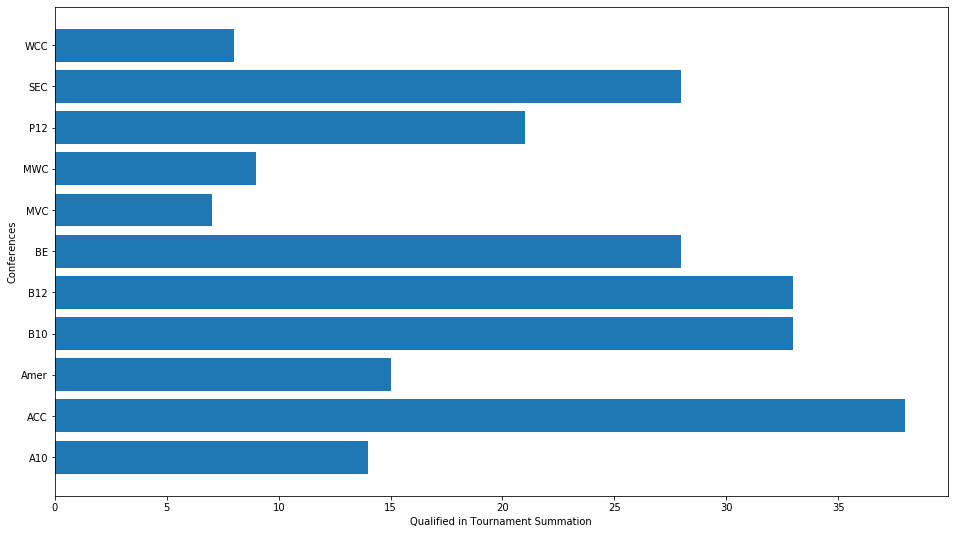

In [36]:
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(con.index, con["Qualified?"])
plt.xlabel('Qualified in Tournament Summation')
plt.ylabel('Conferences')
plt.show()

In [37]:
import seaborn as sns

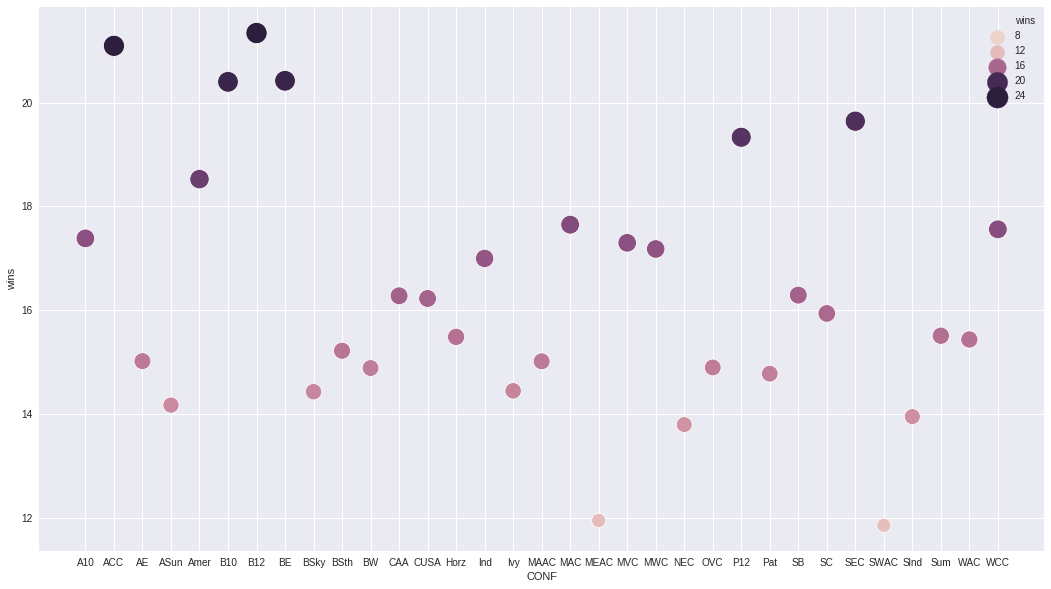

In [214]:
plt.style.use('seaborn-darkgrid')
fig, ax = plt.subplots(figsize=(18,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sns.scatterplot(x=conference_mean.index, y=conference_mean['wins'],
                     hue="wins", size="wins",
                     sizes=(200, 450), hue_norm=(11, 21),
                    data=conference_mean)

In [39]:
df["SEED"].value_counts()

17.0    1417
16.0      30
11.0      30
3.0       21
15.0      20
10.0      20
2.0       20
6.0       20
9.0       20
7.0       20
14.0      20
5.0       20
8.0       20
12.0      20
13.0      20
1.0       20
4.0       19
Name: SEED, dtype: int64

In [40]:
seeding_list = list(set(er for er in df_all_qualfied["SEED"].unique()))

In [41]:
seeding_list

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0]

In [42]:
ui = ['Three_Point_Shooting_Percentage', 'Effective_Field_Goal_Percentage_Shot', 'Offensive_Rebounds',
         'Three_Point_Shooting_Percentage_Allowed', 'Steal_Rate', 'Win_Percentage', 'Defensive_Rebounds', 
         'Power Rating', 'Adjusted Defensive Efficiency', 'Two_Point_Shooting_Percentage', 'Wins_Above_Bubble',
        'games_played', 'Adjusted Offensive Efficiency', 'Effective_Field_Goal_Percentage_Allowed', 'Turnover_Rate', 
         'Two_Point_Shooting_Percentage_Allowed', 'Adjusted_Tempo']

#### API NCAA

In [43]:
#!pip install sportsreference

In [44]:
from sportsreference.ncaab.rankings import Rankings

In [45]:
rankings = Rankings()

In [46]:
print(rankings.current)

{'louisville': 1, 'kansas': 2, 'maryland': 3, 'michigan': 4, 'virginia': 5, 'ohio-state': 6, 'north-carolina': 7, 'kentucky': 8, 'gonzaga': 9, 'duke': 10, 'michigan-state': 11, 'arizona': 12, 'oregon': 13, 'auburn': 14, 'memphis': 15, 'seton-hall': 16, 'florida-state': 17, 'baylor': 18, 'dayton': 19, 'colorado': 20, 'tennessee': 21, 'washington': 22, 'villanova': 23, 'butler': 24, 'utah-state': 25}


In [47]:
from datetime import datetime
from sportsreference.ncaab.boxscore import Boxscores

In [48]:
#games = Boxscores(datetime(2019, 11, 5), datetime(2020, 3, 8))

In [49]:
#games.games

####### https://sportsreference.readthedocs.io/en/stable/ncaab.html#boxscore

In [50]:
#Dummify Conference for each team
def dummy_nv(X):
    '''
    X : Series passed in function
    Return x dataframe of all dummies
    '''
    x = pd.get_dummies(X, drop_first=True, dummy_na=False)
    return x

In [51]:
conff = dummy_nv(df['CONF'])
conff

,ACC,AE,ASun,Amer,B10,B12,BE,BSky,BSth,BW,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
conff_q = dummy_nv(df_all_qualfied['CONF'])
conff_q

,ACC,AE,ASun,Amer,B10,B12,BE,BSky,BSth,BW,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1753,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1754,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
#teams = dummy_nv(df['TEAM'])
#teams

In [54]:
#Adding dummys to dataframe
df = pd.concat([df,conff],axis=1)

In [55]:
df_all_qualfied = pd.concat([df_all_qualfied,conff_q],axis=1)

In [56]:
df.head()

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,0,0,0,0,0,0,0,0,0,0
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,0,0,0,0,0,0,0,0,0,0
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,0,0,0,0,0,0,0,0,0,0
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,0,0,0,0,0,0,0,0,0,0
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df_n.head()

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2,1.0,2016,82.500000,1
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2,1.0,2015,90.000000,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2,3.0,2018,82.500000,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2,3.0,2019,81.578947,1
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2,1.0,2017,94.871795,1


In [58]:
df.corr()

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
games_played,1.000000,0.708838,0.613432,-0.606166,0.688059,0.346425,-0.481942,-0.336407,0.065020,0.261046,...,0.129612,-0.026510,-0.042037,-0.058081,0.171538,-0.031772,-0.242195,-0.108281,-0.073088,0.027424
wins,0.708838,1.000000,0.754532,-0.690753,0.814512,0.617839,-0.609144,-0.467073,0.138805,0.296395,...,0.081031,-0.045335,-0.006219,-0.014996,0.097418,-0.121706,-0.076664,-0.024247,-0.025378,0.027374
Adjusted Offensive Efficiency,0.613432,0.754532,1.000000,-0.528576,0.870686,0.732683,-0.333693,-0.601024,-0.116231,0.261351,...,0.142881,-0.073550,-0.031869,-0.016649,0.188769,-0.240551,-0.130624,-0.001021,-0.083961,0.061532
Adjusted Defensive Efficiency,-0.606166,-0.690753,-0.528576,1.000000,-0.852432,-0.221381,0.792320,0.219779,-0.234615,-0.294066,...,-0.128268,0.079335,0.013655,0.071294,-0.214994,0.183755,0.154497,0.069718,0.028758,-0.045610
Power Rating,0.688059,0.814512,0.870686,-0.852432,1.000000,0.543153,-0.627696,-0.472329,0.054377,0.310917,...,0.167538,-0.098907,-0.028834,-0.047928,0.236806,-0.228569,-0.168486,-0.041813,-0.060783,0.055487
Effective_Field_Goal_Percentage_Shot,0.346425,0.617839,0.732683,-0.221381,0.543153,1.000000,-0.120335,-0.367975,-0.144287,-0.147990,...,0.078079,0.059692,-0.031340,0.057504,0.004896,-0.217574,-0.042040,0.074762,-0.079677,0.052145
Effective_Field_Goal_Percentage_Allowed,-0.481942,-0.609144,-0.333693,0.792320,-0.627696,-0.120335,1.000000,0.101070,-0.020831,-0.341636,...,-0.058833,0.085561,-0.024005,0.104000,-0.146983,0.033477,0.113249,0.090644,-0.027068,-0.008909
Turnover_Rate,-0.336407,-0.467073,-0.601024,0.219779,-0.472329,-0.367975,0.101070,1.000000,0.103437,0.134433,...,-0.057463,0.043339,0.019800,0.045058,-0.024738,0.150786,0.170729,-0.075013,0.068991,-0.075282
Steal_Rate,0.065020,0.138805,-0.116231,-0.234615,0.054377,-0.144287,-0.020831,0.103437,1.000000,0.118496,...,-0.067003,0.011260,0.032886,0.038372,0.036589,0.101202,0.135177,-0.107298,0.029017,-0.077545
Offensive_Rebounds,0.261046,0.296395,0.261351,-0.294066,0.310917,-0.147990,-0.341636,0.134433,0.118496,1.000000,...,0.044764,-0.109230,0.025890,0.008968,0.133770,0.059720,0.039994,-0.119935,0.014010,-0.034438


In [59]:
df_n.corr()

,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
games_played,1.000000,0.708838,0.613432,-0.606166,0.688059,0.346425,-0.481942,-0.336407,0.065020,0.261046,...,-0.439340,0.225821,-0.349726,-0.040433,0.666595,0.434666,-0.559288,0.052233,0.564318,0.518884
wins,0.708838,1.000000,0.754532,-0.690753,0.814512,0.617839,-0.609144,-0.467073,0.138805,0.296395,...,-0.529558,0.432743,-0.485485,-0.016057,0.905029,0.548941,-0.611352,0.091829,0.979314,0.613484
Adjusted Offensive Efficiency,0.613432,0.754532,1.000000,-0.528576,0.870686,0.732683,-0.333693,-0.601024,-0.116231,0.261351,...,-0.328822,0.579193,-0.198275,0.070476,0.851663,0.484978,-0.632206,0.048861,0.714593,0.554311
Adjusted Defensive Efficiency,-0.606166,-0.690753,-0.528576,1.000000,-0.852432,-0.221381,0.792320,0.219779,-0.234615,-0.294066,...,0.728488,-0.102715,0.564135,0.227852,-0.809486,-0.437902,0.554318,0.055367,-0.646726,-0.496754
Power Rating,0.688059,0.814512,0.870686,-0.852432,1.000000,0.543153,-0.627696,-0.472329,0.054377,0.310917,...,-0.588121,0.386597,-0.427750,-0.079611,0.941776,0.520992,-0.619235,0.000228,0.771483,0.575938
Effective_Field_Goal_Percentage_Shot,0.346425,0.617839,0.732683,-0.221381,0.543153,1.000000,-0.120335,-0.367975,-0.144287,-0.147990,...,-0.104079,0.763028,-0.100545,0.120142,0.562904,0.332371,-0.366300,0.196195,0.631026,0.367611
Effective_Field_Goal_Percentage_Allowed,-0.481942,-0.609144,-0.333693,0.792320,-0.627696,-0.120335,1.000000,0.101070,-0.020831,-0.341636,...,0.907933,-0.043770,0.722404,0.273412,-0.629864,-0.357466,0.410080,0.211657,-0.584527,-0.395381
Turnover_Rate,-0.336407,-0.467073,-0.601024,0.219779,-0.472329,-0.367975,0.101070,1.000000,0.103437,0.134433,...,0.091686,-0.333397,0.066363,-0.102687,-0.470286,-0.273554,0.316584,-0.054840,-0.455757,-0.304349
Steal_Rate,0.065020,0.138805,-0.116231,-0.234615,0.054377,-0.144287,-0.020831,0.103437,1.000000,0.118496,...,0.027203,-0.177276,-0.106798,-0.065216,0.094765,0.078198,-0.056540,-0.051754,0.149150,0.084297
Offensive_Rebounds,0.261046,0.296395,0.261351,-0.294066,0.310917,-0.147990,-0.341636,0.134433,0.118496,1.000000,...,-0.341291,-0.143735,-0.197189,-0.105308,0.332275,0.194431,-0.262930,-0.217610,0.274567,0.222390


In [60]:
data_2015 = df[df['YEAR'] == 2015]
data_2016 = df[df['YEAR'] == 2016]
data_2017 = df[df['YEAR'] == 2017]
data_2018 = df[df['YEAR'] == 2018]
data_2019 = df[df['YEAR'] == 2019]

In [61]:
data_2015_qual = df_all_qualfied[df_all_qualfied['YEAR'] == 2015]
data_2016_qual = df_all_qualfied[df_all_qualfied['YEAR'] == 2016]
data_2017_qual = df_all_qualfied[df_all_qualfied['YEAR'] == 2017]
data_2018_qual = df_all_qualfied[df_all_qualfied['YEAR'] == 2018]
data_2019_qual = df_all_qualfied[df_all_qualfied['YEAR'] == 2019]

In [62]:
data_2019

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,0,0,0,0,0,0,0,0,0,0
6,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,0,0,0,0,0,0,0,0,0,0
16,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,0,0,0,0,0,0,0,0,0,0
17,Purdue,B10,36,26,122.8,94.3,0.9539,53.6,49.0,15.8,...,0,0,0,0,0,0,0,0,0,0
27,Kentucky,SEC,37,30,117.5,89.8,0.9568,53.0,46.6,18.6,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,...,0,0,0,0,0,0,0,0,0,0
1734,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,0,0,0,0,0,0,0,0,0,0
1749,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,...,1,0,0,0,0,0,0,0,0,0
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,0,0,0,0,1,0,0,0,0,0


In [63]:
data_2019_qual

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,0,0,0,0,0,0,0,0,0,0
6,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,0,0,0,0,0,0,0,0,0,0
16,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,...,0,0,0,0,0,0,0,0,0,0
17,Purdue,B10,36,26,122.8,94.3,0.9539,53.6,49.0,15.8,...,0,0,0,0,0,0,0,0,0,0
27,Kentucky,SEC,37,30,117.5,89.8,0.9568,53.0,46.6,18.6,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,Houston,Amer,37,33,115.7,90.5,0.9439,52.1,42.5,16.5,...,0,0,0,0,0,0,0,0,0,0
1734,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,...,0,0,0,0,0,0,0,0,0,0
1749,Oregon,P12,38,25,108.1,91.7,0.8687,52.0,46.4,17.8,...,1,0,0,0,0,0,0,0,0,0
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,0,0,0,0,1,0,0,0,0,0


In [64]:
data_2019['SEED'].unique()

array([ 3.,  1.,  2.,  5., 17.,  9., 10.,  6., 11.,  4., 12., 13.,  7.,
        8., 15., 16., 14.])

In [65]:
data_2019_qual['SEED'].unique()

array([ 3.,  1.,  2.,  5.,  9., 10.,  6., 11.,  4., 12., 13.,  7.,  8.,
       15., 16., 14.])

In [66]:
data_2019['POSTSEASON'].unique()

array([2, 1, 4, 3, 0, 6, 7, 8, 5])

In [67]:
data_2019_qual['POSTSEASON'].unique()

array([2, 1, 4, 3, 6, 7, 8, 5])

In [68]:
# Show relationship between POSTSEASON & SEED each year
year_list = [2015, 2016, 2017, 2018, 2019]
for nu in year_list:
    d1 = df[df['YEAR'] == nu]
    d1_n = d1[d1['POSTSEASON']<3]
    print(d1_n[['SEED', 'POSTSEASON']].corr())

                SEED  POSTSEASON
SEED        1.000000   -0.948348
POSTSEASON -0.948348    1.000000
                SEED  POSTSEASON
SEED        1.000000   -0.958116
POSTSEASON -0.958116    1.000000
                SEED  POSTSEASON
SEED        1.000000   -0.948348
POSTSEASON -0.948348    1.000000
                SEED  POSTSEASON
SEED        1.000000   -0.925057
POSTSEASON -0.925057    1.000000
               SEED  POSTSEASON
SEED        1.00000    -0.92506
POSTSEASON -0.92506     1.00000


### DECISION TREE MODEL

In [69]:
from sklearn import neighbors, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [70]:
ls = ["TEAM", "SEED", "POSTSEASON", "CONF", "wins", "Qualified?"]

In [71]:
df_new1 = df.drop((i for i in ls), axis=1)

In [72]:
df_new1

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,40,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,...,0,0,0,0,0,0,0,0,0,0
1,40,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,...,0,0,0,0,0,0,0,0,0,0
2,40,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,...,0,0,0,0,0,0,0,0,0,0
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,0,0,0,0,0,0,0,0,0,0
4,39,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,35,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,...,0,0,0,0,1,0,0,0,0,0
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,0,0,0,0,1,0,0,0,0,0
1754,36,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,...,0,0,0,0,1,0,0,0,0,0
1755,35,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,...,0,0,0,0,0,0,0,0,0,1


In [73]:
df_new_qual = df_all_qualfied.drop((i for i in ls), axis=1)

In [74]:
df_new_qual

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,40,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,...,0,0,0,0,0,0,0,0,0,0
1,40,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,...,0,0,0,0,0,0,0,0,0,0
2,40,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,...,0,0,0,0,0,0,0,0,0,0
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,0,0,0,0,0,0,0,0,0,0
4,39,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,35,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,...,0,0,0,0,1,0,0,0,0,0
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,0,0,0,0,1,0,0,0,0,0
1754,36,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,...,0,0,0,0,1,0,0,0,0,0
1755,35,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,...,0,0,0,0,0,0,0,0,0,1


In [75]:
data_2015_new = data_2015.drop((e for e in ls), axis=1)
data_2016_new = data_2016.drop((e for e in ls), axis=1)
data_2017_new = data_2017.drop((e for e in ls), axis=1)
data_2018_new = data_2018.drop((e for e in ls), axis=1)
data_2019_new = data_2019.drop((e for e in ls), axis=1)

In [76]:
data_2015_new_qual = data_2015_qual.drop((e for e in ls), axis=1)
data_2016_new_qual = data_2016_qual.drop((e for e in ls), axis=1)
data_2017_new_qual = data_2017_qual.drop((e for e in ls), axis=1)
data_2018_new_qual = data_2018_qual.drop((e for e in ls), axis=1)
data_2019_new_qual = data_2019_qual.drop((e for e in ls), axis=1)

In [77]:
data_2019_new

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,0,0,0,0,0,0,0,0,0,0
6,38,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,...,0,0,0,0,0,0,0,0,0,0
16,38,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,...,0,0,0,0,0,0,0,0,0,0
17,36,122.8,94.3,0.9539,53.6,49.0,15.8,18.6,34.5,27.0,...,0,0,0,0,0,0,0,0,0,0
27,37,117.5,89.8,0.9568,53.0,46.6,18.6,17.9,36.8,25.5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,37,115.7,90.5,0.9439,52.1,42.5,16.5,18.2,34.4,26.0,...,0,0,0,0,0,0,0,0,0,0
1734,37,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,...,0,0,0,0,0,0,0,0,0,0
1749,38,108.1,91.7,0.8687,52.0,46.4,17.8,20.9,29.6,28.8,...,1,0,0,0,0,0,0,0,0,0
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,0,0,0,0,1,0,0,0,0,0


In [78]:
data_2019_new_qual

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,0,0,0,0,0,0,0,0,0,0
6,38,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,...,0,0,0,0,0,0,0,0,0,0
16,38,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,...,0,0,0,0,0,0,0,0,0,0
17,36,122.8,94.3,0.9539,53.6,49.0,15.8,18.6,34.5,27.0,...,0,0,0,0,0,0,0,0,0,0
27,37,117.5,89.8,0.9568,53.0,46.6,18.6,17.9,36.8,25.5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726,37,115.7,90.5,0.9439,52.1,42.5,16.5,18.2,34.4,26.0,...,0,0,0,0,0,0,0,0,0,0
1734,37,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,...,0,0,0,0,0,0,0,0,0,0
1749,38,108.1,91.7,0.8687,52.0,46.4,17.8,20.9,29.6,28.8,...,1,0,0,0,0,0,0,0,0,0
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,0,0,0,0,1,0,0,0,0,0


In [79]:
df_new1

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,40,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,...,0,0,0,0,0,0,0,0,0,0
1,40,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,...,0,0,0,0,0,0,0,0,0,0
2,40,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,...,0,0,0,0,0,0,0,0,0,0
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,0,0,0,0,0,0,0,0,0,0
4,39,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,35,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,...,0,0,0,0,1,0,0,0,0,0
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,0,0,0,0,1,0,0,0,0,0
1754,36,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,...,0,0,0,0,1,0,0,0,0,0
1755,35,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,...,0,0,0,0,0,0,0,0,0,1


In [80]:
X_imp = df_new1[['Three_Point_Shooting_Percentage', 'Effective_Field_Goal_Percentage_Shot', 'Offensive_Rebounds',
         'Three_Point_Shooting_Percentage_Allowed', 'Steal_Rate', 'Win_Percentage', 'Defensive_Rebounds', 
         'Power Rating', 'Adjusted Defensive Efficiency', 'Two_Point_Shooting_Percentage', 'Wins_Above_Bubble',
        'games_played', 'Adjusted Offensive Efficiency', 'Effective_Field_Goal_Percentage_Allowed', 'Turnover_Rate', 
         'Two_Point_Shooting_Percentage_Allowed', 'Adjusted_Tempo']]

In [81]:
X_imp
X = df_new1
Y = df['SEED']
X_2019 = data_2019_new
Y_2019 = data_2019['SEED']

In [82]:
for i in data_2019_new.columns:
    print(i)

games_played
Adjusted Offensive Efficiency
Adjusted Defensive Efficiency
Power Rating
Effective_Field_Goal_Percentage_Shot
Effective_Field_Goal_Percentage_Allowed
Turnover_Rate
Steal_Rate
Offensive_Rebounds
Defensive_Rebounds
Free_Throw_Rate
Free_Throw_Rate_Allowed
Two_Point_Shooting_Percentage
Two_Point_Shooting_Percentage_Allowed
Three_Point_Shooting_Percentage
Three_Point_Shooting_Percentage_Allowed
Adjusted_Tempo
Wins_Above_Bubble
YEAR
Win_Percentage
ACC
AE
ASun
Amer
B10
B12
BE
BSky
BSth
BW
CAA
CUSA
Horz
Ind
Ivy
MAAC
MAC
MEAC
MVC
MWC
NEC
OVC
P12
Pat
SB
SC
SEC
SWAC
Slnd
Sum
WAC
WCC


In [83]:
X_trainA, X_testA, y_trainA, y_testA = train_test_split(X, Y, test_size=0.3, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_2019, Y_2019, test_size=0.3, random_state=1)
X_trainI, X_testI, y_trainI, y_testI = train_test_split(X_imp, Y, test_size=0.3, random_state=1)

In [84]:
clf1 = tree.DecisionTreeClassifier(max_depth=3)
clf = tree.DecisionTreeClassifier(max_depth=3)
clfI = tree.DecisionTreeClassifier()

In [85]:
clf1 = clf1.fit(X_train,y_train)
clf = clf.fit(X_trainA,y_trainA)
clfI = clfI.fit(X_trainI,y_trainI)

In [86]:
y_pred = clf1.predict(X_test)
y_hat = clf.predict(X_testA)
y_h = clfI.predict(X_testI)

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8018867924528302


In [88]:
print("Accuracy:",metrics.accuracy_score(y_testA, y_hat))

Accuracy: 0.8333333333333334


#### IMPORTANT FEATURES

In [89]:
print("Accuracy:",metrics.accuracy_score(y_testI, y_h))

Accuracy: 0.7935606060606061


In [90]:
#!conda install python-graphviz -y
#!conda install pydotplus -y

/home/ehi58/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


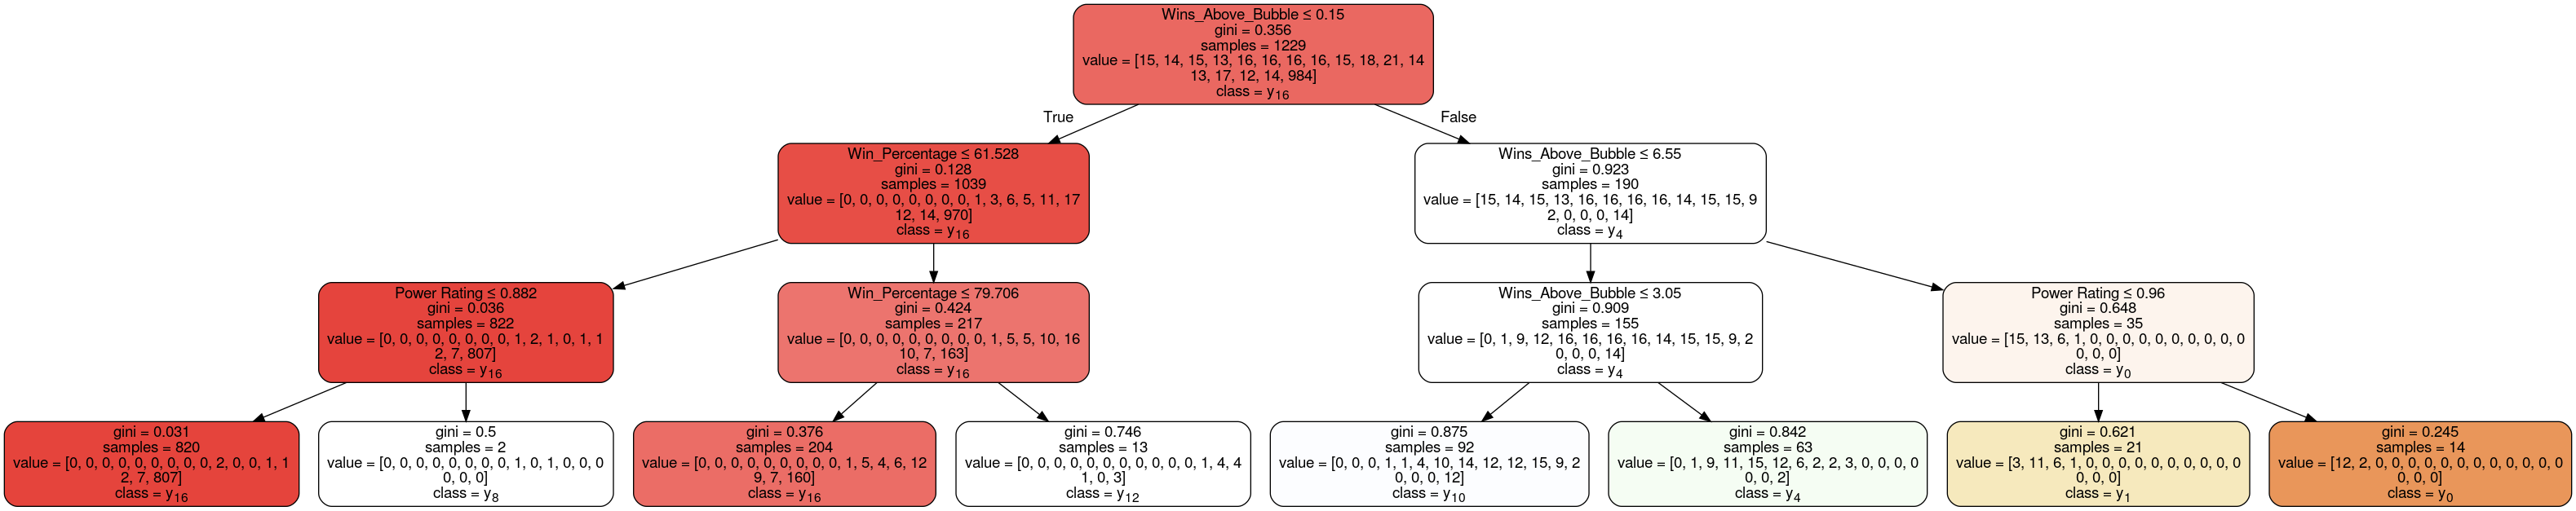

In [91]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

In [92]:
#Image(graph.create_png())

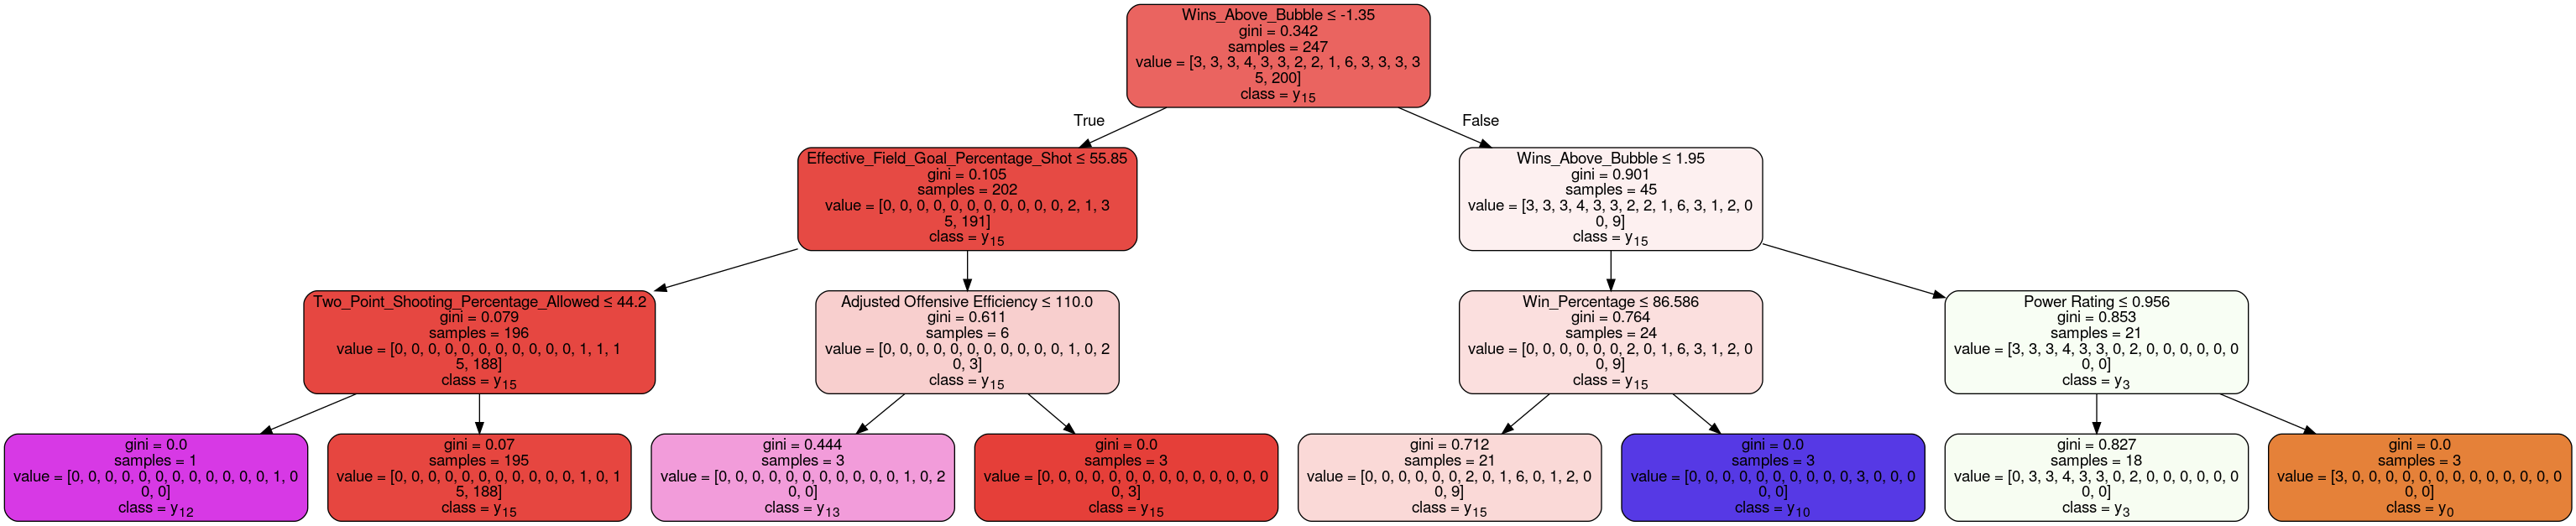

In [93]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_2019.columns,class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree1.png')
Image(graph.create_png())

In [94]:
# Entrophy Applied
clf_e = DecisionTreeClassifier(criterion="entropy",max_depth=7)
clf_e = clf.fit(X_trainA,y_trainA)
y_hat = clf.predict(X_testA)

In [95]:
print("Accuracy:",metrics.accuracy_score(y_testA, y_hat))

Accuracy: 0.8333333333333334


In [96]:
X_2019.shape[1]

52

In [97]:
feats = clf.feature_importances_
feats

array([0.        , 0.        , 0.        , 0.05227537, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.85335736, 0.        , 0.09436726,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [98]:
feats.shape

(52,)

#### FEATURE IMPORTANCE

In [99]:
#!conda install -c districtdatalabs yellowbrick -y

In [100]:
from yellowbrick.model_selection import FeatureImportances

/home/ehi58/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/home/ehi58/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


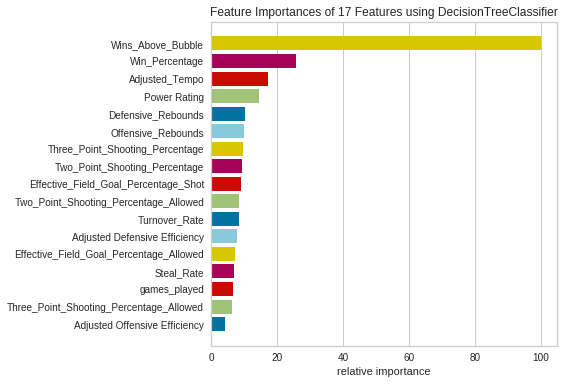

In [101]:
viz = FeatureImportances(clfI)
viz.fit(X_imp, Y)
viz.show()

In [102]:
#plot_feature_importances_cancer(clf1,X1,feats)

In [103]:
range(407)

range(0, 407)

In [104]:
#ordered_dict = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}

### RANDOM FOREST

In [105]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [106]:
X_trainAr, X_testAr, y_trainAr, y_testAr = train_test_split(X, Y, test_size=0.3, random_state=1)
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X_2019, Y_2019, test_size=0.3, random_state=1)
X_trainIr, X_testIr, y_trainIr, y_testIr = train_test_split(X_imp, Y, test_size=0.3, random_state=1)

In [107]:
clfr = RandomForestClassifier()
clf1r = RandomForestClassifier()
clfIr = RandomForestClassifier()

In [108]:
clfr = clfr.fit(X_trainAr,y_trainAr)
clf1r = clf1r.fit(X_trainr,y_trainr)
clfIr = clfIr.fit(X_trainIr,y_trainIr)

In [109]:
y_predr = clfr.predict(X_testAr)
y_hatr = clf1r.predict(X_testr)
y_hr = clfIr.predict(X_testIr)

In [110]:
print("Accuracy:",metrics.accuracy_score(y_testAr, y_predr))

Accuracy: 0.8371212121212122


In [111]:
print("Accuracy:",metrics.accuracy_score(y_testr, y_hatr))

Accuracy: 0.8207547169811321


In [112]:
print("Accuracy:",metrics.accuracy_score(y_testIr, y_hr))

Accuracy: 0.8428030303030303


#### RANDOM FOREST REGRESSOR

In [113]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [115]:
X_qual = df_new_qual
Y_qual = df_all_qualfied["SEED"]

In [116]:
X_trainq, X_testq, y_trainq, y_testq = train_test_split(X_qual, Y_qual, test_size=0.3, random_state=0)

In [117]:
sc = StandardScaler()
X_trainq = sc.fit_transform(X_trainq)
X_testq = sc.transform(X_testq)

In [165]:
regressor = RandomForestRegressor(n_estimators=10, random_state=1,
                                 bootstrap = False, max_depth = 3, max_features = 'log2', 
                                min_samples_leaf = 4, min_samples_split = 2)

In [166]:
regressor.fit(X_trainq, y_trainq)
y_prediction = regressor.predict(X_testq)
y_prediction

array([ 8.72460722, 13.731433  , 12.4792371 , 11.67644568, 10.0040298 ,
        6.62635668,  9.0863819 , 10.33142238,  8.72460722,  9.92138896,
        8.81196163, 10.88430495,  7.30739482,  8.43088895,  7.61517801,
        6.11799246,  5.36391878,  8.41351186,  8.81196163,  5.74427441,
       11.82573913, 11.2332137 , 13.21576227,  5.81992376, 10.12341307,
       11.95342029,  8.56664529,  5.79830992, 10.10148017,  5.38950544,
        9.31236669, 13.08808111,  9.03737863,  6.90958132,  6.30557793,
       10.67863146, 10.70223644,  8.63418316,  8.54124445,  5.90727817,
        7.53795806, 12.95076053,  6.67483367,  5.55231972, 11.00645852,
       12.95076053,  7.77038634,  5.28826943,  8.93774102,  6.39048116,
       11.95342029,  7.35773615, 10.70346784,  5.75292016,  8.00980408,
       10.31538596, 10.57793201, 10.08099527,  5.01346833,  4.64502806,
       14.85508379,  9.45795892,  8.63683235,  8.74547766,  5.46515479,
        4.93910213,  5.90727817,  4.92179539,  8.33434566, 10.08

In [167]:
X_trainq.shape, y_trainq.shape

((238, 51), (238,))

In [168]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_testq, y_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_testq, y_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_testq, y_prediction)))

Mean Absolute Error: 1.9470994093646188
Mean Squared Error: 5.458080961302994
Root Mean Squared Error: 2.336253616648457


In [169]:
scorer_mse = make_scorer(mean_squared_error)

In [170]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(regressor,
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring=scorer_mse)
rf_gridsearch.fit(X_trainq, y_trainq)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    7.4s


best parameters: {'bootstrap': False, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   15.5s finished


In [177]:
X_trainq.shape, y_trainq.shape

((238, 51), (238,))

#### GRAPHS

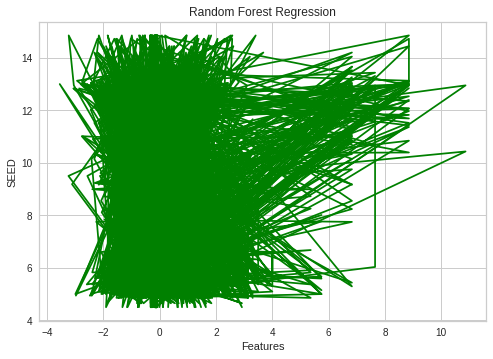

In [179]:

# between two consecutive values 
#X_grid = np.arange(min(X_trainq), max(X_trainq), 0.01)  
  
# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
#X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# Scatter plot for original data 
#plt.scatter(X_trainq, y_trainq, color = 'blue')   
  
# plot predicted data 
plt.plot(X_trainq, regressor.predict(X_trainq),color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Features') 
plt.ylabel('SEED') 
plt.show()


In [181]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence


from sklearn.neural_network import MLPRegressor

In [182]:
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))
est.fit(X_trainq, y_trainq)

/home/ehi58/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (238). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


Pipeline(memory=None,
         steps=[('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=True, epsilon=1e-08,
                              hidden_layer_sizes=(50, 50),
                              learning_rate='constant', learning_rate_init=0.01,
                              max_fun=15000, max_iter=200, momentum=0.9,
                              n_iter_no_change=10, nesterovs_momentum=True,
                              power_t=0.5, random_state=None, shuffle=True,
                              solver='adam', tol=0.0001,
   

#### GRADIENT BOOSTING

In [125]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [126]:
X.shape, Y.shape

((1757, 52), (1757,))

In [127]:
X

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,40,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,...,0,0,0,0,0,0,0,0,0,0
1,40,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,...,0,0,0,0,0,0,0,0,0,0
2,40,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,...,0,0,0,0,0,0,0,0,0,0
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,0,0,0,0,0,0,0,0,0,0
4,39,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,35,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,...,0,0,0,0,1,0,0,0,0,0
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,0,0,0,0,1,0,0,0,0,0
1754,36,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,...,0,0,0,0,1,0,0,0,0,0
1755,35,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
X_trainArr, X_testArr, y_trainArr, y_testArr = train_test_split(X, Y, test_size=0.3, random_state=1)
X_trainrr, X_testrr, y_trainrr, y_testrr = train_test_split(X_2019, Y_2019, test_size=0.3, random_state=1)
X_trainIrr, X_testIrr, y_trainIrr, y_testIrr = train_test_split(X_imp, Y, test_size=0.3, random_state=1)

In [129]:
learning_list = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

#### ALL

In [130]:
for learning_rate in learning_list:
    gbs_clf = GradientBoostingClassifier()
    gbs_clfA = GradientBoostingClassifier()
    gbs_clfAI = GradientBoostingClassifier()
    gbs_clf.fit(X_trainr, y_trainr)
    gbs_clfA.fit(X_trainArr, y_trainArr)
    gbs_clfAI.fit(X_trainIrr, y_trainIrr)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ",gbs_clf.score(X_trainrr, y_trainrr))
    print("Accuracy score (testing): ",gbs_clf.score(X_testrr, y_testrr))
    #print("Accuracy score (validation): ",gb_clf.score(X_val, y_val))

Learning rate:  0.05
Accuracy score (training):  1.0
Accuracy score (testing):  0.7830188679245284
Learning rate:  0.1
Accuracy score (training):  1.0
Accuracy score (testing):  0.7830188679245284
Learning rate:  0.25
Accuracy score (training):  1.0
Accuracy score (testing):  0.7830188679245284
Learning rate:  0.5
Accuracy score (training):  1.0
Accuracy score (testing):  0.7924528301886793
Learning rate:  0.75
Accuracy score (training):  1.0
Accuracy score (testing):  0.7641509433962265
Learning rate:  1
Accuracy score (training):  1.0
Accuracy score (testing):  0.7924528301886793


#### YEAR 2019

In [131]:
for learning_rate in learning_list:
    gbs_clfA = GradientBoostingClassifier()
    gbs_clfA.fit(X_trainArr, y_trainArr)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ",gbs_clfA.score(X_trainArr, y_trainArr))
    print("Accuracy score (testing): ",gbs_clfA.score(X_testArr, y_testArr))
    #print("Accuracy score (validation): ",gb_clf.score(X_val, y_val))

Learning rate:  0.05
Accuracy score (training):  1.0
Accuracy score (testing):  0.8238636363636364
Learning rate:  0.1
Accuracy score (training):  1.0
Accuracy score (testing):  0.8257575757575758
Learning rate:  0.25
Accuracy score (training):  1.0
Accuracy score (testing):  0.8257575757575758
Learning rate:  0.5
Accuracy score (training):  1.0
Accuracy score (testing):  0.8295454545454546
Learning rate:  0.75
Accuracy score (training):  1.0
Accuracy score (testing):  0.8238636363636364
Learning rate:  1
Accuracy score (training):  1.0
Accuracy score (testing):  0.8295454545454546


#### ONLY IMPORTANT FEATURES

In [132]:
for learning_rate in learning_list:
    gbs_clfAI = GradientBoostingClassifier()
    gbs_clfAI.fit(X_trainIrr, y_trainIrr)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): ",gbs_clfAI.score(X_trainIrr, y_trainIrr))
    print("Accuracy score (testing): ",gbs_clfAI.score(X_testIrr, y_testIrr))
    #print("Accuracy score (validation): ",gb_clf.score(X_val, y_val))

Learning rate:  0.05
Accuracy score (training):  1.0
Accuracy score (testing):  0.8238636363636364
Learning rate:  0.1
Accuracy score (training):  1.0
Accuracy score (testing):  0.8295454545454546
Learning rate:  0.25
Accuracy score (training):  1.0
Accuracy score (testing):  0.821969696969697
Learning rate:  0.5
Accuracy score (training):  1.0
Accuracy score (testing):  0.8276515151515151
Learning rate:  0.75
Accuracy score (training):  1.0
Accuracy score (testing):  0.8276515151515151
Learning rate:  1
Accuracy score (training):  1.0
Accuracy score (testing):  0.8314393939393939


#### LINEAR REGRESSION

In [133]:
X_qual = df_new_qual
Y_qual = df_all_qualfied["SEED"]

In [134]:
lss = ["TEAM", "CONF", "wins", "POSTSEASON"]

In [135]:
df_reg = df_n.drop((i for i in lss), axis=1)

In [136]:
df_n.head()

,TEAM,CONF,games_played,wins,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,...,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,POSTSEASON,SEED,YEAR,Win_Percentage,Qualified?
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,44.6,32.7,36.2,71.7,8.6,2,1.0,2016,82.500000,1
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,44.7,36.5,37.5,59.3,11.3,2,1.0,2015,90.000000,1
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,46.8,35.2,33.2,65.9,6.9,2,3.0,2018,82.500000,1
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,41.9,36.5,29.7,67.5,7.0,2,3.0,2019,81.578947,1
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,40.0,38.2,29.0,71.5,7.7,2,1.0,2017,94.871795,1


In [137]:
df_reg

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,Two_Point_Shooting_Percentage,Two_Point_Shooting_Percentage_Allowed,Three_Point_Shooting_Percentage,Three_Point_Shooting_Percentage_Allowed,Adjusted_Tempo,Wins_Above_Bubble,SEED,YEAR,Win_Percentage,Qualified?
0,40,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,...,53.9,44.6,32.7,36.2,71.7,8.6,1.0,2016,82.500000,1
1,40,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,...,54.8,44.7,36.5,37.5,59.3,11.3,1.0,2015,90.000000,1
2,40,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,...,54.7,46.8,35.2,33.2,65.9,6.9,3.0,2018,82.500000,1
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,52.8,41.9,36.5,29.7,67.5,7.0,3.0,2019,81.578947,1
4,39,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,...,56.3,40.0,38.2,29.0,71.5,7.7,1.0,2017,94.871795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,35,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,...,52.5,45.7,32.9,32.6,70.3,1.9,7.0,2018,62.857143,1
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,52.9,49.4,31.9,33.7,71.2,7.3,3.0,2019,80.000000,1
1754,36,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,...,55.4,44.7,36.7,35.4,68.8,9.9,2.0,2019,86.111111,1
1755,35,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,...,54.3,44.4,37.8,30.3,68.2,2.1,11.0,2016,77.142857,1


In [138]:
df_new1

,games_played,Adjusted Offensive Efficiency,Adjusted Defensive Efficiency,Power Rating,Effective_Field_Goal_Percentage_Shot,Effective_Field_Goal_Percentage_Allowed,Turnover_Rate,Steal_Rate,Offensive_Rebounds,Defensive_Rebounds,...,P12,Pat,SB,SC,SEC,SWAC,Slnd,Sum,WAC,WCC
0,40,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,...,0,0,0,0,0,0,0,0,0,0
1,40,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,...,0,0,0,0,0,0,0,0,0,0
2,40,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,...,0,0,0,0,0,0,0,0,0,0
3,38,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,...,0,0,0,0,0,0,0,0,0,0
4,39,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,35,111.2,94.7,0.8640,51.4,46.9,19.2,15.3,33.9,27.3,...,0,0,0,0,1,0,0,0,0,0
1753,35,117.9,96.6,0.9081,51.2,49.9,17.9,20.1,36.7,30.8,...,0,0,0,0,1,0,0,0,0,0
1754,36,122.8,95.2,0.9488,55.3,48.1,15.8,18.0,31.6,30.2,...,0,0,0,0,1,0,0,0,0,0
1755,35,117.4,94.5,0.9238,55.2,44.8,17.1,15.1,32.1,26.0,...,0,0,0,0,0,0,0,0,0,1


In [139]:
df_reg_wo = df_reg.drop("SEED", axis=1)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [141]:
#X2 = df_reg_wo
#Y2 = df_reg['SEED']

In [142]:
X_train_qual, X_test_qual, y_train_qual, y_test_qual = train_test_split(X_qual, Y_qual, test_size=0.3, random_state=1)

In [143]:
reg = LinearRegression()
reg = reg.fit(X_train_qual, y_train_qual)

In [144]:
y_predict = reg.predict(X_test_qual)

In [145]:
print("R-Squared:",r2_score(y_test_qual, y_predict))

R-Squared: 0.8526070408039328


#### OLS - STATSMODEL

In [146]:
import statsmodels.api as sm

In [147]:
Xq = sm.add_constant(X_qual)
yq = Y_qual

In [148]:
mod = sm.OLS(yq, Xq)

In [149]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   SEED   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     64.09
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          1.57e-129
Time:                        09:13:46   Log-Likelihood:                -578.93
No. Observations:                 340   AIC:                             1262.
Df Residuals:                     288   BIC:                             1461.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [150]:
y_hat = res.predict(Xq)

#### Year 2019

In [151]:
X9 = sm.add_constant(data_2019_new_qual)
y9 = data_2019_qual['SEED']

In [152]:
mod1 = sm.OLS(y9, X9)

In [153]:
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                   SEED   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     44.36
Date:                Fri, 28 Aug 2020   Prob (F-statistic):           4.71e-12
Time:                        09:13:46   Log-Likelihood:                -37.931
No. Observations:                  68   AIC:                             175.9
Df Residuals:                      18   BIC:                             286.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [154]:
y_hat_2019 = res1.predict(X9)

#### GRAPHS

In [155]:
from statsmodels.graphics.api import abline_plot

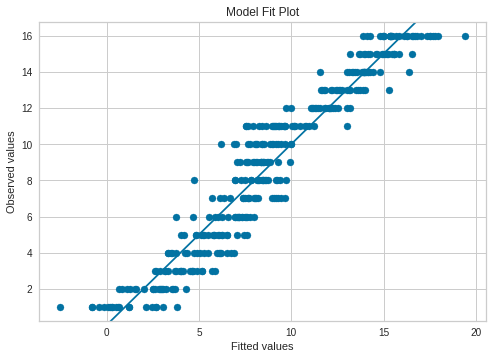

In [156]:
fig, ax = plt.subplots()
ax.scatter(y_hat, yq)
line_fit = sm.OLS(yq, sm.add_constant(y_hat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

In [220]:
X.columns

Index(['games_played', 'Adjusted Offensive Efficiency',
       'Adjusted Defensive Efficiency', 'Power Rating',
       'Effective_Field_Goal_Percentage_Shot',
       'Effective_Field_Goal_Percentage_Allowed', 'Turnover_Rate',
       'Steal_Rate', 'Offensive_Rebounds', 'Defensive_Rebounds',
       'Free_Throw_Rate', 'Free_Throw_Rate_Allowed',
       'Two_Point_Shooting_Percentage',
       'Two_Point_Shooting_Percentage_Allowed',
       'Three_Point_Shooting_Percentage',
       'Three_Point_Shooting_Percentage_Allowed', 'Adjusted_Tempo',
       'Wins_Above_Bubble', 'YEAR', 'Win_Percentage', 'ACC', 'AE', 'ASun',
       'Amer', 'B10', 'B12', 'BE', 'BSky', 'BSth', 'BW', 'CAA', 'CUSA', 'Horz',
       'Ind', 'Ivy', 'MAAC', 'MAC', 'MEAC', 'MVC', 'MWC', 'NEC', 'OVC', 'P12',
       'Pat', 'SB', 'SC', 'SEC', 'SWAC', 'Slnd', 'Sum', 'WAC', 'WCC'],
      dtype='object')

#### Logistics Regression

In [157]:
y = df['Qualified?']

In [216]:
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.179529
         Iterations 22


In [217]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:             Qualified?   No. Observations:                 1757
Model:                          Logit   Df Residuals:                     1705
Method:                           MLE   Df Model:                           51
Date:                Fri, 28 Aug 2020   Pseudo R-squ.:                  0.6346
Time:                        14:34:51   Log-Likelihood:                -315.43
converged:                       True   LL-Null:                       -863.17
Covariance Type:            nonrobust   LLR p-value:                5.567e-196
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
games_played                                0.2622      0.064      4.076      0.000       0.136       0.388
Adjusted Offensive Efficiency               

In [218]:
y_hatp = log_reg.predict(X)
y_hatp

0       0.999969
1       1.000000
2       0.999824
3       0.999984
4       0.999990
          ...   
1752    0.708397
1753    0.998096
1754    0.999986
1755    0.929284
1756    0.981774
Length: 1757, dtype: float64

In [160]:
x_2019_qual = data_2019_new_qual
y_2019_qual = data_2019_qual["Qualified?"]

#### 2019

In [210]:
#log_reg9 = sm.Logit(y_2019_qual, x_2019_qual).fit()

In [211]:
#print(log_reg9.summary())

In [212]:
#data_2019_new_qual.corr()

In [213]:
#data_2019_qual.corr()